# Final Models Conclusion

I had Three types of datasets which are
 1. Original Data
 2. Original Data + Data Augmentation 1
 3. Original Data + Data Augmentation 2
 
I have trained VGG16, VGG19, Densenet, Resnet on these data. I have created three types of training for each model.
 
 1. logistic regression (Baseline model)
 2. Training only FC layers.
 3. Training All layers

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import re
import random
from tqdm import tqdm
import tensorflow as tf
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import Sequential, Model, load_model

 1. FC represents Training FC layers only.
 2. ALL represents Training all layers.
 
 3. Stage 1 is Checking Damaged or Not
 4. Stage 2 is Damage Localization (Front, Rear or Side)
 5. Stage 3 is Damage Severity (Minor, Moderate, Severe)

### Original Data

In [9]:
vgg16 = pd.read_csv('Original_data/vgg16_scores.csv')
vgg19 = pd.read_csv('Original_data/vgg19_scores.csv')
densenet = pd.read_csv('Original_data/densenet_scores.csv')
resnet = pd.read_csv('Original_data/resnet_scores.csv')

In [13]:
from IPython.display import display_html

In [24]:
with pd.option_context('display.precision', 3):
    df1_styler = vgg16.style.set_table_attributes("style='display:inline'").set_caption('Vgg16')
    df2_styler = vgg19.style.set_table_attributes("style='display:inline'").set_caption('Vgg19')
    df3_styler = densenet.style.set_table_attributes("style='display:inline'").set_caption('Densenet')
    df4_styler = resnet.style.set_table_attributes("style='display:inline'").set_caption('Resnet')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_()+df3_styler._repr_html_()+df4_styler._repr_html_(), raw=True)

,Model,Accuracy,Precision,Recall
0,Vgg16_stage1_baseline,0.932,0.916,0.952
1,Vgg16_stage2_baseline,0.698,0.709,0.689
2,Vgg16_stage3_baseline,0.626,0.626,0.616
3,Vgg16_stage1 FC,0.930,0.913,0.952
4,Vgg16_stage2 FC,0.687,0.698,0.677
5,Vgg16_stage3 FC,0.649,0.640,0.646
6,Vgg16_stage1 all,0.943,0.969,0.961
7,Vgg16_stage2 all,0.631,0.646,0.616
8,Vgg16_stage3 all,0.538,0.525,0.524
,Model,Accuracy,Precision,Recall


1. Stage 1 (Check Damaged or Not):

    For Stage 1 we can see that Densenet trained on all layers is performing better than other models. We have got an accuracy of 96.3 % on this model, precision of 94.9% and recall of 97.8%


2. Stage 2 (Damage Localization):

    For Stage 2 we can see that Densenet trained on all layers is performing better than other models. We have got an accuracy of 76.5 % on this model, precision of 76.8% and recall of 74.4%


3. Stage 3 (Damage Severity)

    For Stage 2 we can see that Resnet trained on all layers is performing better than other models. We have got an accuracy of 67.8 % on this model, precision of 68.5% and recall of 67.3%

### Original Data + Data Augmentation 1

In [25]:
vgg16 = pd.read_csv('Original_Aug1_data/vgg16_scores.csv')
vgg19 = pd.read_csv('Original_Aug1_data/vgg19_scores.csv')
densenet = pd.read_csv('Original_Aug1_data/densenet_scores.csv')
resnet = pd.read_csv('Original_Aug1_data/resnet_scores.csv')

In [26]:
from IPython.display import display_html

In [27]:
with pd.option_context('display.precision', 3):
    df1_styler = vgg16.style.set_table_attributes("style='display:inline'").set_caption('Vgg16')
    df2_styler = vgg19.style.set_table_attributes("style='display:inline'").set_caption('Vgg19')
    df3_styler = densenet.style.set_table_attributes("style='display:inline'").set_caption('Densenet')
    df4_styler = resnet.style.set_table_attributes("style='display:inline'").set_caption('Resnet')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_()+df3_styler._repr_html_()+df4_styler._repr_html_(), raw=True)

,Model,Accuracy,Precision,Recall
0,Vgg16_stage1_baseline,0.933,0.938,0.926
1,Vgg16_stage2_baseline,0.737,0.746,0.730
2,Vgg16_stage3_baseline,0.661,0.650,0.652
3,Vgg16_stage1 FC,0.930,0.919,0.943
4,Vgg16_stage2 FC,0.709,0.717,0.707
5,Vgg16_stage3 FC,0.643,0.650,0.637
6,Vgg16_stage1 all,0.939,0.935,0.943
7,Vgg16_stage2 all,0.564,0.559,0.558
8,Vgg16_stage3 all,0.637,0.632,0.621
,Model,Accuracy,Precision,Recall


1. Stage 1 (Check Damaged or Not):

    For Stage 1 we can see that Resnet and Densenet trained on all layers are performing better than other models. We have got an accuracy of 96.1 % on resnet model but precison is lower than the densenet model. For Densenet model accuracy is 95.9%,  precision of 94.9% and recall of 97.8%.


2. Stage 2 (Damage Localization):

    For Stage 2 we can see that Densenet trained on all layers is performing better than other models. We have got an accuracy of 80.4 % on this model, precision of 80.7% and recall of 78.9%


3. Stage 3 (Damage Severity)

    For Stage 2 we can see that Resnet trained on all layers is performing better than other models. We have got an accuracy of 69.6 % on this model, precision of 69.2% and recall of 68.5%

### Original Data + Data Augmentation 2

In [28]:
vgg16 = pd.read_csv('Original_Aug2_data/vgg16_scores.csv')
vgg19 = pd.read_csv('Original_Aug2_data/vgg19_scores.csv')
densenet = pd.read_csv('Original_Aug2_data/densenet_scores.csv')
resnet = pd.read_csv('Original_Aug2_data/resnet_scores.csv')

In [29]:
from IPython.display import display_html

In [30]:
with pd.option_context('display.precision', 3):
    df1_styler = vgg16.style.set_table_attributes("style='display:inline'").set_caption('Vgg16')
    df2_styler = vgg19.style.set_table_attributes("style='display:inline'").set_caption('Vgg19')
    df3_styler = densenet.style.set_table_attributes("style='display:inline'").set_caption('Densenet')
    df4_styler = resnet.style.set_table_attributes("style='display:inline'").set_caption('Resnet')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_()+df3_styler._repr_html_()+df4_styler._repr_html_(), raw=True)

,Model,Accuracy,Precision,Recall
0,Vgg16_stage1_baseline,0.922,0.915,0.930
1,Vgg16_stage2_baseline,0.743,0.740,0.733
2,Vgg16_stage3_baseline,0.661,0.650,0.651
3,Vgg16_stage1 FC,0.926,0.908,0.948
4,Vgg16_stage2 FC,0.726,0.732,0.723
5,Vgg16_stage3 FC,0.655,0.654,0.641
6,Vgg16_stage1 all,0.935,0.954,0.913
7,Vgg16_stage2 all,0.665,0.667,0.669
8,Vgg16_stage3 all,0.608,0.607,0.586
,Model,Accuracy,Precision,Recall


1. Stage 1 (Check Damaged or Not):

    For Stage 1 we can see that Resnet and Densenet trained on all layers are performing better than other models. We have got an accuracy of 95.4 % on resnet model but precison is lower than the densenet model. For Densenet model accuracy is 95.4%,  precision of 94.1% and recall of 96.9%.


2. Stage 2 (Damage Localization):

    For Stage 2 we can see that Densenet trained on all layers is performing better than other models. We have got an accuracy of 77.7 % on this model, precision of 77.8% and recall of 766.6%


3. Stage 3 (Damage Severity)

    For Stage 2 we can see that Resnet trained on all layers is performing better than other models. We have got an accuracy of 68.4 % on this model, precision of 68.6% and recall of 68.0%

## Conclusion:

1. From above all models we can see that the Densenet (Trained on all layers) model which is trained on the Original data with augmentation 1 is performing best in Stage 2 and Stage 3.  
2. For Stage 1 densenet (Trained on all layers) trained on Orginal data with Augmentation 1 is very close to the model trained on Orginal data and precision of both models are same. So we can use the densenet (Trained on all layers) trained on Orginal data with Augmentation 1 instead of model trained on original data.

## Visualization of Falsely Predicted images

## Stage 1

#### Getting Edge cases for Best Model

In [31]:
path = 'C:\\Users\\Priyathambns\\Desktop\\Case study -2\\data\\data_1\\test'
class_labels = os.listdir(path)

In [32]:
file_1 = [path+'\\damaged'+'\\'+i for i in os.listdir(path+'\\damaged')]
file_2 = [path+'\\not_damaged'+'\\'+i for i in os.listdir(path+'\\not_damaged')]
files_list = file_1+file_2

In [33]:
test_gen = ImageDataGenerator()
x_test = test_gen.flow_from_directory(path,target_size = (256,256),batch_size = 1, class_mode = "binary",shuffle = False)

Found 460 images belonging to 2 classes.


In [34]:
y_true = list(x_test.classes)

In [35]:
best_model = load_model('Original_Aug1_data/densenet/densenet_stage1_all-0.959.hdf5')

In [36]:
y_predicted = best_model.predict(x_test)

In [37]:
y_pred = []
for i in y_predicted:
    if i<=0.5:
        y_pred.append(0)
    else:
        y_pred.append(1)

In [38]:
def get_edge_cases(y_true,y_pred):
    fp = []
    fn = []
    for i in range(len(y_pred)):
        if y_pred[i] == 0:
            if y_true[i] == 1:
                fp.append(files_list[i])
        if y_pred[i] == 1:
            if y_true[i] == 0:
                fn.append(files_list[i])
    print('Number of False positives is',len(fp))
    print('Number of False negatives is',len(fn))
    return fp,fn

In [39]:
False_positives,False_negatives = get_edge_cases(y_true,y_pred)

Number of False positives is 12
Number of False negatives is 7


### False Positives

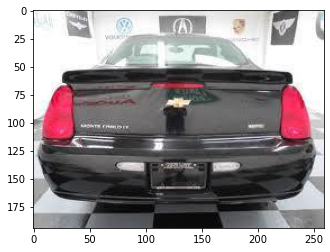

In [40]:
#False Positives (Predicted to be damaged but true value is not_damaged)
plt.imshow(load_img(False_positives[0]))

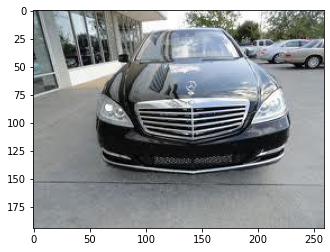

In [41]:
plt.imshow(load_img(False_positives[1]))

### False Negatives

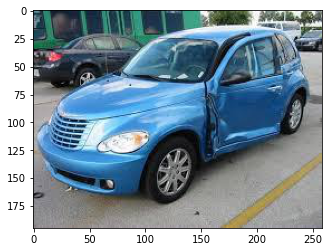

In [42]:
#False Positives (Predicted to be not damaged but true value is damaged)
plt.imshow(load_img(False_negatives[0]))

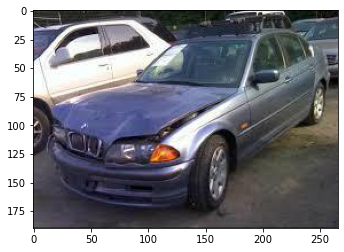

In [43]:
plt.imshow(load_img(False_negatives[1]))

## Stage 2

#### Getting Edge cases for Best Model

In [44]:
path = 'C:\\Users\\Priyathambns\\Desktop\\Case study -2\\data\\data_2\\test'
class_labels = os.listdir(path)

In [45]:
file_1 = [path+'\\front'+'\\'+i for i in os.listdir(path+'\\front')]
file_2 = [path+'\\rear'+'\\'+i for i in os.listdir(path+'\\rear')]
file_3 = [path+'\\side'+'\\'+i for i in os.listdir(path+'\\side')]
files_list = file_1+file_2+file_3

In [46]:
test_gen = ImageDataGenerator()
x_test = test_gen.flow_from_directory(path,target_size = (256,256),batch_size = 1,shuffle = False)

Found 179 images belonging to 3 classes.


In [47]:
y_true = list(x_test.classes)

In [48]:
best_model = load_model('Original_Aug1_data/densenet/densenet_stage2_all-0.804.hdf5')

In [49]:
y_predicted = best_model.predict(x_test)

In [50]:
y_pred = []
for i in y_predicted:
    y_pred.append(np.argmax(i))

In [51]:
def get_edge_cases(y_true,y_pred):
    false_front = []
    false_rear = []
    false_side = []
    for i in range(len(y_pred)):
        if y_pred[i] == 0:
            if y_true[i] == 1 or y_true[i] == 2:
                false_front.append([files_list[i],y_true[i]])
        if y_pred[i] == 1:
            if y_true[i] == 0 or y_true[i] == 2:
                false_rear.append([files_list[i],y_true[i]])
        if y_pred[i] == 2:
            if y_true[i]==0 or y_true[i] == 1:
                false_side.append([files_list[i],y_true[i]])
    return false_front,false_rear,false_side

In [52]:
f_front,f_rear,f_side = get_edge_cases(y_true,y_pred)

### False Front

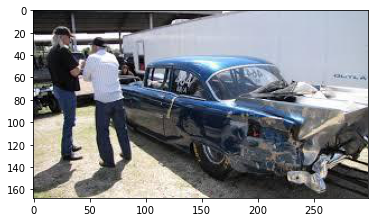

In [53]:
#Predicted to be damaged at front but true value is rear
plt.imshow(load_img(f_front[2][0]))

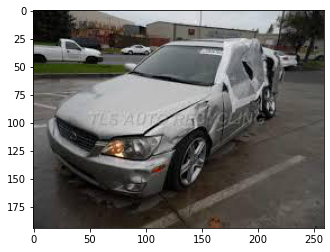

In [54]:
#Predicted to be damaged at front but true value is side
plt.imshow(load_img(f_front[-1][0]))

### False Rear

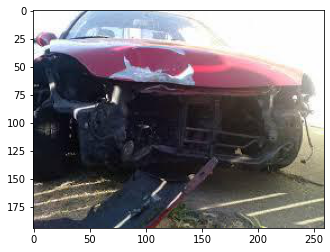

In [55]:
#Predicted to be damaged at rear but true value is front
plt.imshow(load_img(f_rear[0][0]))

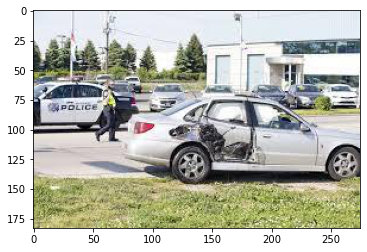

In [56]:
#Predicted to be damaged at rear but true value is side
plt.imshow(load_img(f_rear[-1][0]))

### False side

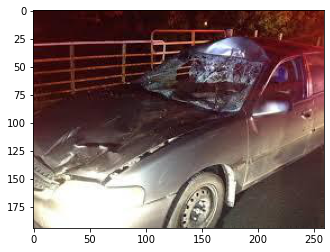

In [57]:
#Predicted to be damaged at side but true value is front
plt.imshow(load_img(f_side[0][0]))

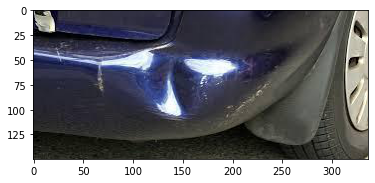

In [58]:
#Predicted to be damaged at side but true value is rear
plt.imshow(load_img(f_side[-1][0]))

## Stage 3

#### Getting Edge cases for Best Model

In [59]:
path = 'C:\\Users\\Priyathambns\\Desktop\\Case study -2\\data\\data_3\\test'
class_labels = os.listdir(path)

In [60]:
file_1 = [path+'\\minor'+'\\'+i for i in os.listdir(path+'\\minor')]
file_2 = [path+'\\moderate'+'\\'+i for i in os.listdir(path+'\\moderate')]
file_3 = [path+'\\severe'+'\\'+i for i in os.listdir(path+'\\severe')]
files_list = file_1+file_2+file_3

In [61]:
test_gen = ImageDataGenerator()
x_test = test_gen.flow_from_directory(path,target_size = (256,256),batch_size = 1,shuffle = False)

Found 171 images belonging to 3 classes.


In [62]:
y_true = list(x_test.classes)

In [63]:
best_model = load_model('Original_Aug1_data/densenet/densenet_stage3_all-0.696.hdf5')

In [64]:
y_predicted = best_model.predict(x_test)

In [65]:
y_pred = []
for i in y_predicted:
    y_pred.append(np.argmax(i))

In [66]:
def get_edge_cases(y_true,y_pred):
    false_minor = []
    false_moderate = []
    false_severe = []
    for i in range(len(y_pred)):
        if y_pred[i] == 0:
            if y_true[i] == 1 or y_true[i] == 2:
                false_minor.append([files_list[i],y_true[i]])
        if y_pred[i] == 1:
            if y_true[i] == 0 or y_true[i] == 2:
                false_moderate.append([files_list[i],y_true[i]])
        if y_pred[i] == 2:
            if y_true[i]==0 or y_true[i] == 1:
                false_severe.append([files_list[i],y_true[i]])

    return false_minor,false_moderate,false_severe

In [67]:
f_minor,f_moderate,f_severe = get_edge_cases(y_true,y_pred)

### False minor

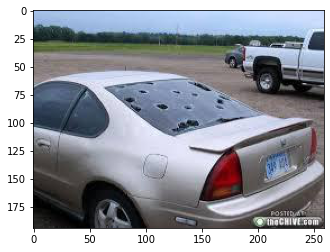

In [68]:
#Predicted to be damaged to be minor but true value is moderate
plt.imshow(load_img(f_minor[0][0]))

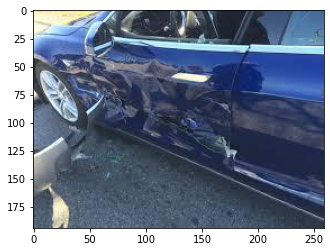

In [69]:
#Predicted to be damaged to be front but true value is severe
plt.imshow(load_img(f_minor[-1][0]))

### False Moderate

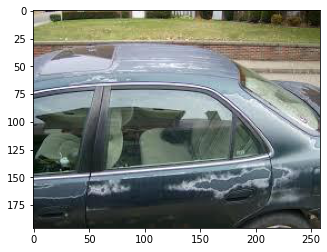

In [70]:
#Predicted to be damaged to be Moderate but true value is minor
plt.imshow(load_img(f_moderate[0][0]))

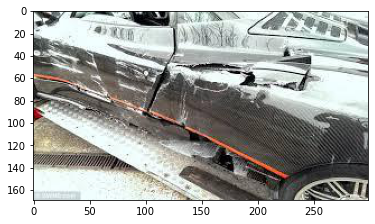

In [71]:
#Predicted to be damaged to be moderate but true value is severe
plt.imshow(load_img(f_moderate[-3][0]))

### False Severe

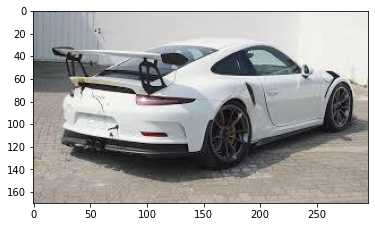

In [72]:
#Predicted to be damaged to be severe but true value is minor
plt.imshow(load_img(f_severe[1][0]))

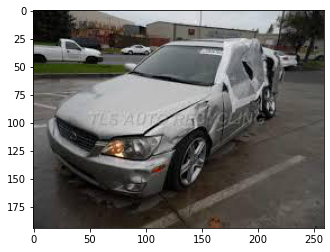

In [73]:
#Predicted to be damaged to be severe but true value is moderate
plt.imshow(load_img(f_severe[-1][0]))